# Data Analysis

In [61]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [392]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
ls

README               u.occupation         u4.base
allbut.pl*           u.user               u4.test
data_analysis.ipynb  u1.base              u5.base
mku.sh*              u1.test              u5.test
u.data               u2.base              ua.base
u.genre              u2.test              ua.test
u.info               u3.base              ub.base
u.item               u3.test              ub.test


In [124]:
df_ratings = pd.read_csv('u.data', delimiter='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

In [125]:
df_ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [126]:
def ratings_clean_up(df):
    df.drop(columns=['timestamp'], inplace=True)
    df.drop(df[df['rating'] ==1].index, inplace=True)

ratings_clean_up(df_ratings)
df_ratings.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
3,244,51,2
5,298,474,4
6,115,265,2


In [132]:
df_ratings.rating.value_counts()

4    34174
3    27145
5    21201
2    11370
Name: rating, dtype: int64

<BarContainer object of 4 artists>

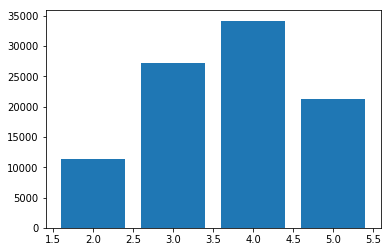

In [133]:
plt.bar(df_ratings.rating.value_counts().index, df_ratings.rating.value_counts().values)

# Genre: List of genre

In [127]:
df_genres = pd.read_csv('u.genre' , delimiter='|', names=['type', 'index'])
df_genres

,type,index
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [128]:
list_of_genres = list(df_genres['type'])

# df_movies: Info about the movies available

In [300]:
df_movies = pd.read_csv('u.item', delimiter='|', encoding='latin-1', names = ['item_id', 'title', 'release_date','nan_vals',
                                                                             'imdb'] + list_of_genres, index_col ='item_id' )
df_movies.head()

,title,release_date,nan_vals,imdb,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
item_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [301]:
def movies_clean_up(df):
    df.drop(columns=['nan_vals'], inplace=True)
    df.drop(df[df['unknown'] == 1].index, inplace=True)
    df.drop(columns=['unknown', 'release_date', 'imdb'], inplace=True)
    df.reset_index(inplace=True)
    
movies_clean_up(df_movies)
df_movies.head()

,item_id,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


# df_users: Info about past users who have done ratings

In [357]:
df_users = pd.read_csv('u.user', names = ['user_id', 'age', 'gender', 'occupation', 'zip_code'], delimiter='|')

In [358]:
df_users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [359]:
df_users.occupation.unique()

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

In [360]:
def users_clean_up(df):
    df.drop(columns=['zip_code'], inplace=True)
    df.drop(df_users[df_users['occupation'] == "other"].index, inplace=True)
    df.drop(df_users[df_users['occupation'] == "none"].index, inplace=True)
    df.reset_index(inplace=True, drop=True)

users_clean_up(df_users)
df_users.occupation.value_counts()
df_users_labelled = df_users.copy()
df_users_clusters =df_users.copy()

In [361]:
df_users.gender.value_counts()

M    596
F    233
Name: gender, dtype: int64

## One hot encoding categorical variables

In [362]:
df_users = df_users.join(pd.get_dummies(df_users['gender']))
df_users = df_users.join(pd.get_dummies(df_users['occupation']))
df_users.drop(columns=['gender', 'occupation'], inplace=True)
df_users.head()

,user_id,age,F,M,administrator,artist,doctor,educator,engineer,entertainment,...,lawyer,librarian,marketing,programmer,retired,salesman,scientist,student,technician,writer
0,1,24,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,23,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4,24,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,42,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,57,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [363]:
df_users.shape

(829, 23)

In [364]:
df_users[df_users['student'] == 1].age.value_counts()

20    25
19    21
22    21
17    13
18    13
21    13
23    11
25    11
24     8
28     8
26     7
27     7
15     5
29     5
16     4
14     3
30     3
32     3
13     3
31     2
34     2
35     2
10     1
42     1
40     1
36     1
38     1
7      1
Name: age, dtype: int64

In [278]:
df_test = df_users.copy()

In [279]:
errors = []

def get_errors(centre, df):
    
    return mean_squared_error([centre]*df.shape[0], df).mean()

for i in range(1,13):
    clf_error = []
    kmean = KMeans(n_clusters=i)
    kmean.fit(df_test.drop(columns=['user_id']))
    cluster_vector = {i+1:kmean.cluster_centers_[i] for i in range(len(kmean.cluster_centers_))}
    df = df_test.join(pd.DataFrame(kmean_clustering.labels_, columns=['cluster']))
    
    for cluster, centroid in cluster_vector.items():
        clf_error.append(get_errors(centroid, df[df['cluster'] == cluster].drop(columns=['cluster', 'user_id'])))
        
    errors.append(sum(clf_error)/ len(clf_error))


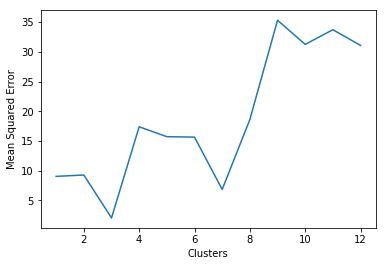

In [280]:
plt.xlabel("Clusters")
plt.ylabel("Mean Squared Error")
plt.plot(range(1,13), errors)


## Using 7 clusters as it has the minimum error

In [281]:
k = KMeans(n_clusters=7)


In [282]:
k.fit(df_users.drop(columns=['user_id']))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [283]:
k.cluster_centers_

array([[ 4.27959184e+01,  2.95918367e-01,  7.04081633e-01,
         9.18367347e-02,  5.10204082e-02,  3.06122449e-02,
         1.32653061e-01,  1.32653061e-01,  1.02040816e-02,
         7.14285714e-02,  4.08163265e-02,  1.02040816e-02,
        -1.04083409e-17,  9.18367347e-02,  4.08163265e-02,
         8.16326531e-02,  3.12250226e-17,  1.02040816e-02,
         8.16326531e-02,  2.04081633e-02,  2.04081633e-02,
         8.16326531e-02],
       [ 2.44804469e+01,  2.01117318e-01,  7.98882682e-01,
         6.70391061e-02,  3.35195531e-02,  2.94902991e-17,
         4.46927374e-02,  8.93854749e-02,  3.91061453e-02,
         3.35195531e-02,  1.11731844e-02,  1.11731844e-02,
         5.58659218e-03,  2.23463687e-02,  2.79329609e-02,
         1.06145251e-01,  5.89805982e-17,  5.58659218e-03,
         2.79329609e-02,  3.63128492e-01,  5.58659218e-02,
         5.58659218e-02],
       [ 5.04568966e+01,  3.53448276e-01,  6.46551724e-01,
         1.72413793e-01,  8.62068966e-03,  8.62068966e-03,
    

In [284]:
df_users_labelled = df_users_labelled.join(pd.DataFrame(k.labels_, columns=['cluster']))

In [285]:
df_users_labelled.head()

,user_id,age,gender,occupation,cluster
0,1,24,M,technician,1
1,3,23,M,writer,1
2,4,24,M,technician,1
3,6,42,M,executive,0
4,7,57,M,administrator,3


In [286]:
df_test = df_users_labelled.copy()

In [287]:
for i in range(8):
    print("Number of cluster ")
    print(i)
    print(df_test[df_test.cluster == i].occupation.value_counts())
    print("Age: ")
    print(df_test[df_test.cluster == i].age.describe())

Number of cluster 
0
educator         13
engineer         13
administrator     9
librarian         9
scientist         8
writer            8
programmer        8
executive         7
artist            5
healthcare        4
marketing         4
doctor            3
technician        2
student           2
homemaker         1
salesman          1
entertainment     1
Name: occupation, dtype: int64
Age: 
count    98.000000
mean     42.795918
std       1.994628
min      40.000000
25%      41.000000
50%      43.000000
75%      44.000000
max      46.000000
Name: age, dtype: float64
Number of cluster 
1
student          65
programmer       19
engineer         16
administrator    12
technician       10
writer           10
educator          8
entertainment     7
artist            6
executive         6
scientist         5
marketing         5
librarian         4
healthcare        2
homemaker         2
lawyer            1
salesman          1
Name: occupation, dtype: int64
Age: 
count    179.000000
mean  

## YEEET YEEET LOOKS SOLID but also need to include user-preference

In [288]:
df_users_labelled.cluster.value_counts()

1    179
4    161
5    124
2    116
6    107
0     98
3     44
Name: cluster, dtype: int64

## Working on including user preference and then doing KMeans Clustering again

In [289]:
df_ratings.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
3,244,51,2
5,298,474,4
6,115,265,2


In [302]:
df_movies.head()

,item_id,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [373]:
df = df_ratings.merge(df_movies.drop(columns=['title']), on='item_id')

## User Preferences DF

In [375]:
df_test = df.merge(df_users_labelled[['user_id']], on='user_id')
user_pref = df_test.drop(columns=['rating', 'item_id']).groupby('user_id').mean().reset_index()
user_pref.head()

,user_id,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0.264228,0.126016,0.044715,0.056911,0.321138,0.085366,0.020325,0.414634,0.008130,0.004065,0.048780,0.040650,0.016260,0.174797,0.170732,0.203252,0.097561,0.024390
1,3,0.260870,0.086957,0.000000,0.000000,0.195652,0.173913,0.021739,0.391304,0.000000,0.043478,0.086957,0.043478,0.239130,0.108696,0.152174,0.347826,0.086957,0.000000
2,4,0.333333,0.166667,0.000000,0.000000,0.166667,0.166667,0.041667,0.250000,0.000000,0.000000,0.041667,0.041667,0.208333,0.125000,0.250000,0.458333,0.083333,0.000000
3,6,0.112745,0.093137,0.049020,0.083333,0.308824,0.068627,0.004902,0.504902,0.009804,0.029412,0.019608,0.063725,0.053922,0.196078,0.063725,0.117647,0.102941,0.024510
4,7,0.236504,0.149100,0.033419,0.092545,0.221080,0.082262,0.012853,0.372751,0.017995,0.028278,0.102828,0.066838,0.048843,0.141388,0.118252,0.192802,0.105398,0.046272


In [334]:
df_test = df_users.merge(user_pref, on='user_id')
df_test.head()

,user_id,age,F,M,administrator,artist,doctor,educator,engineer,entertainment,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,0,1,0,0,0,0,0,0,...,0.008130,0.004065,0.048780,0.040650,0.016260,0.174797,0.170732,0.203252,0.097561,0.024390
1,3,23,0,1,0,0,0,0,0,0,...,0.000000,0.043478,0.086957,0.043478,0.239130,0.108696,0.152174,0.347826,0.086957,0.000000
2,4,24,0,1,0,0,0,0,0,0,...,0.000000,0.000000,0.041667,0.041667,0.208333,0.125000,0.250000,0.458333,0.083333,0.000000
3,6,42,0,1,0,0,0,0,0,0,...,0.009804,0.029412,0.019608,0.063725,0.053922,0.196078,0.063725,0.117647,0.102941,0.024510
4,7,57,0,1,1,0,0,0,0,0,...,0.017995,0.028278,0.102828,0.066838,0.048843,0.141388,0.118252,0.192802,0.105398,0.046272


## Now that we have both the user preference and user occupation, we gonna try and do KMeans

In [354]:
errors = []

def get_errors(centre, df):
    
    return mean_squared_error([centre]*df.shape[0], df).mean()

for i in range(1,13):
    clf_error = []
    kmean = KMeans(n_clusters=i)
    kmean.fit(df_test.drop(columns=['user_id']))
    cluster_vector = {i+1:kmean.cluster_centers_[i] for i in range(len(kmean.cluster_centers_))}
    df = df_test.join(pd.DataFrame(kmean_clustering.labels_, columns=['cluster']))
    
    for cluster, centroid in cluster_vector.items():
        clf_error.append(get_errors(centroid, df[df['cluster'] == cluster].drop(columns=['cluster', 'user_id'])))
    print(clf_error)  
    errors.append(sum(clf_error)/ len(clf_error))



[4.970457147062257]
[19.737513172560533, 0.23829690466650622]
[25.370174114042417, 0.9263823011958097, 15.935491080762407]
[2.9254979980232445, 6.053583189637395, 39.756759513291826, 9.314766516530492]
[2.0624942640073525, 10.454424310754202, 40.932323487492184, 0.06165245396034482, 4.06284992935119]
[0.05265403937269404, 10.900247022180066, 19.377767431689772, 12.191558224375319, 1.4573669896665669, 2.567523370403614]
[3.143838693769958, 27.171873692994666, 7.231897396390818, 10.100215339782485, 0.17704254304793107, 2.3514775425218417, 0.1582824912630442]
[2.012526784488549, 3.789706151291427, 0.547968551200057, 10.839746350564099, 5.263359768193466, 1.6631821027353226, 4.6003506783581924, 47.2207010129266]
[1.6398148730742048, 11.319292254966363, 12.714850183352727, 11.492912926442123, 0.5636543294118221, 64.5172250117005, 3.9246385998699997, 30.71597687125661, 31.278957204500024]
[13.777714391418863, 0.05898459469159077, 1.021807939370967, 12.424165598276103, 0.08992017217876222, 11

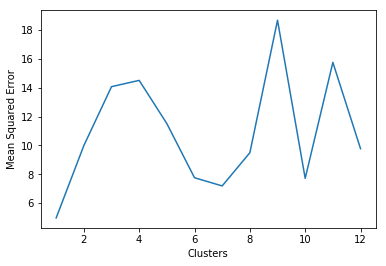

In [355]:
plt.xlabel("Clusters")
plt.ylabel("Mean Squared Error")
plt.plot(range(1,13), errors)

In [367]:
k = KMeans(n_clusters=7)
k.fit(df_test.drop(columns=['user_id']))
df_users_clusters = df_users_clusters.join(pd.DataFrame(k.labels_, columns=['cluster']))
df_users_clusters.head()

,user_id,age,gender,occupation,cluster
0,1,24,M,technician,6
1,3,23,M,writer,6
2,4,24,M,technician,6
3,6,42,M,executive,1
4,7,57,M,administrator,4


In [369]:
for i in df_users_clusters.cluster.unique():
    print(df_users_clusters[df_users_clusters.cluster == i].occupation.value_counts())
    print(df_users_clusters[df_users_clusters.cluster == i].age.describe())

student          64
programmer       13
engineer         13
administrator     9
technician        8
entertainment     7
writer            7
artist            6
educator          4
scientist         3
librarian         2
salesman          2
marketing         2
executive         2
healthcare        1
homemaker         1
lawyer            1
Name: occupation, dtype: int64
count    145.000000
mean      23.055172
std        1.408207
min       21.000000
25%       22.000000
50%       23.000000
75%       24.000000
max       25.000000
Name: age, dtype: float64
educator         18
engineer         17
scientist        14
administrator    13
librarian        10
programmer        9
executive         8
writer            8
artist            7
marketing         6
healthcare        3
technician        3
student           3
entertainment     2
doctor            2
homemaker         1
salesman          1
Name: occupation, dtype: int64
count    125.000000
mean      41.224000
std        2.303097
min       38

## Now the cluster look solid

In [376]:
df_users_clusters.head()

,user_id,age,gender,occupation,cluster
0,1,24,M,technician,6
1,3,23,M,writer,6
2,4,24,M,technician,6
3,6,42,M,executive,1
4,7,57,M,administrator,4


In [381]:
df_users_clusters.cluster.value_counts()

3    150
6    145
5    139
1    125
2    122
0     99
4     49
Name: cluster, dtype: int64

In [377]:
df = df_ratings.merge(df_movies.drop(columns=['title']), on='item_id')

In [378]:
df.head()

,user_id,item_id,rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [385]:
df = df.merge(df_users_clusters[['user_id', 'cluster']], on='user_id')
df.head()

,user_id,item_id,rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,cluster
0,196,242,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
1,196,257,2,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,2
2,196,111,4,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,2
3,196,25,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
4,196,382,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2


In [386]:
cluster_1 = df[df['cluster'] == 1]
cluster_1.head()

,user_id,item_id,rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,cluster
225,296,242,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
226,296,257,5,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
227,296,222,5,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
228,296,274,4,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
229,296,144,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [391]:
for i in range(7):
    print(df[df['cluster'] == i].shape)

(10386, 22)
(11666, 22)
(10929, 22)
(16590, 22)
(4505, 22)
(14225, 22)
(14608, 22)


In [ ]:
def get_cosine_similarity(user):
    
    
    